Try the Naive Bayes model

In [20]:
import logging, importlib, sys, tqdm
import pandas as pd
import os, re, time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearnex import patch_sklearn 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from _pckle import save_pickle_object, load_pickle_object
from _logging import set_logging
from _graph import histplot_count, histplot_range_count
from _metrics import display_metrics
from _utility import gl

set_logging(logging)
X_tfidf = load_pickle_object(gl.pkl_X_tfidf)
df_labels = load_pickle_object(gl.pkl_df_edInput)
#improve performance of SCV
patch_sklearn()

2023-01-05 19:45:58,516 | INFO : Loading pickle file from: pickle\pkl_X_tfidf.pkl
2023-01-05 19:45:58,526 | INFO : Loading pickle file from: pickle\pkl_df_edInput.pkl


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [21]:
df_y = df_labels[gl.edInput]
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_y, test_size = 0.25, stratify=df_y)

2023-01-05 19:45:58,641 | INFO : sklearn.model_selection.train_test_split: fallback to original Scikit-learn
2023-01-05 19:45:58,651 | INFO : sklearn.model_selection.train_test_split: running accelerated version on CPU


In [22]:
t = time.time()
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_multinomialclassifier_NBayes)

train time: 0.007979393005371094
2023-01-05 19:45:58,731 | INFO : Saving pickle file from: pickle\pkl_multinomialclassifier_NBayes.pkl


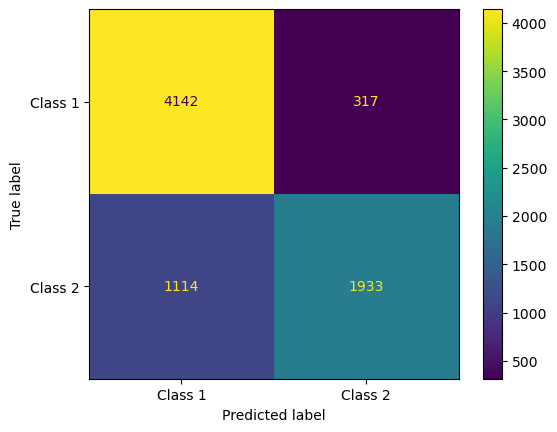

              precision    recall  f1-score   support

     Class 1       0.79      0.93      0.85      4459
     Class 2       0.86      0.63      0.73      3047

    accuracy                           0.81      7506
   macro avg       0.82      0.78      0.79      7506
weighted avg       0.82      0.81      0.80      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.6.


In [23]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The predictions for class one are very good with an F1 value of 0.85<br>
However there are a lot of recall misclassifications for class two and a lower F1 value of 0.73<br>
The Matthews Correlation Coefficient is 0.6

Now try the Complement Naive Bayes algorithm.<br>
This is similar to the Multinomial Bayes algorithm, but normally gives better results for imbalanced datasets.

In [24]:
t = time.time()
classifier = ComplementNB()
classifier.fit(X_train, y_train)
training_time = time.time() - t
print(f"train time: {training_time}" )
save_pickle_object(classifier, gl.pkl_complementclassifier_NBayes)

train time: 0.007980823516845703
2023-01-05 19:45:59,125 | INFO : Saving pickle file from: pickle\pkl_complementclassifier_NBayes.pkl


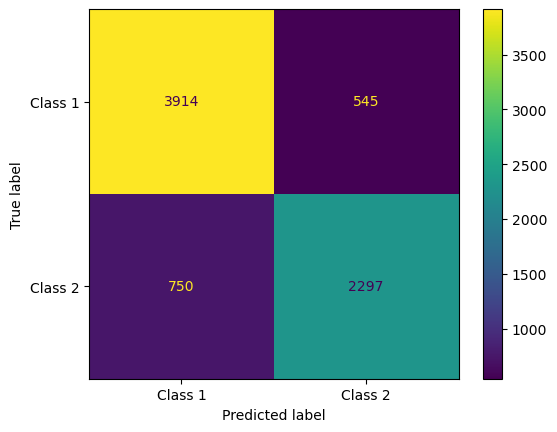

              precision    recall  f1-score   support

     Class 1       0.84      0.88      0.86      4459
     Class 2       0.81      0.75      0.78      3047

    accuracy                           0.83      7506
   macro avg       0.82      0.82      0.82      7506
weighted avg       0.83      0.83      0.83      7506

Taking into account that there are many more non-buiness entries than there are business entries
the Matthews Correlation Coeficient is calculated.
A value of +1 represents perfect prediction, 0 an average random prediction and -1 an inverse predication.
The Matthews Correlation Coefficient in this case is 0.64.


In [25]:
y_pred = classifier.predict(X_test)
display_metrics(y_test, y_pred)

The predictions for class one are very good with an F1 value of 0.86<br>
There are a lot of recall misclassifications for class two but noticeably fewer that for the Multinomial algorithm with an F1 value of 0.78<br>
The Matthews Correlation Coefficient is 0.64, a significant improvement.<br>
The data imbalance is not huge but appears to be enough for the Complement algorithm to work better.

The results for all 3 algorithms - logistc regression, SVM aand Naive Bayes (Complement algorithm) used in this project are all very similar to each other.